In [1]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2fed0b437b047468dcae844319ee547c


In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

596

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | flinders
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | kilakarai
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | vostok
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ville-marie
Processing Record 11 of Set 1 | svencioneliai
Processing Record 12 of Set 1 | saint-philippe
Processing Record 13 of Set 1 | suzu
City not found. Skipping...
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | progreso
Processing Record 18 of Set 1 | lithakia
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 1 | emerald
Processing Record 22 of Set 1 | khon

Processing Record 39 of Set 4 | mogapi
Processing Record 40 of Set 4 | barreirinhas
Processing Record 41 of Set 4 | faanui
Processing Record 42 of Set 4 | henties bay
Processing Record 43 of Set 4 | bacsay
Processing Record 44 of Set 4 | aracoiaba
Processing Record 45 of Set 4 | tuensang
Processing Record 46 of Set 4 | nambucca heads
Processing Record 47 of Set 4 | mogadishu
Processing Record 48 of Set 4 | bambous virieux
Processing Record 49 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 50 of Set 4 | japura
Processing Record 1 of Set 5 | hofn
Processing Record 2 of Set 5 | ambovombe
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | srednekolymsk
Processing Record 5 of Set 5 | lata
Processing Record 6 of Set 5 | tucurui
Processing Record 7 of Set 5 | port elizabeth
Processing Record 8 of Set 5 | ukiah
Processing Record 9 of Set 5 | massakory
Processing Record 10 of Set 5 | gizo
Processing Record 11 of Set 5

City not found. Skipping...
Processing Record 32 of Set 8 | rio verde de mato grosso
Processing Record 33 of Set 8 | san vicente
Processing Record 34 of Set 8 | haapiti
Processing Record 35 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 36 of Set 8 | hamilton
Processing Record 37 of Set 8 | amzya
Processing Record 38 of Set 8 | west bay
Processing Record 39 of Set 8 | chapais
Processing Record 40 of Set 8 | zhigansk
Processing Record 41 of Set 8 | naze
Processing Record 42 of Set 8 | weatherford
Processing Record 43 of Set 8 | naica
Processing Record 44 of Set 8 | katete
Processing Record 45 of Set 8 | djougou
Processing Record 46 of Set 8 | launceston
Processing Record 47 of Set 8 | paamiut
Processing Record 48 of Set 8 | payson
Processing Record 49 of Set 8 | adre
Processing Record 50 of Set 8 | bonavista
Processing Record 1 of Set 9 | doctor juan manuel frutos
Processing Record 2 of Set 9 | coromandel
Processing Record 3 of Set 9 | lucea
Processing Record 4 o

Processing Record 18 of Set 12 | cah ab
City not found. Skipping...
Processing Record 19 of Set 12 | khandbari
Processing Record 20 of Set 12 | sisimiut
Processing Record 21 of Set 12 | sompeta
Processing Record 22 of Set 12 | san juan
Processing Record 23 of Set 12 | tuatapere
Processing Record 24 of Set 12 | key west
Processing Record 25 of Set 12 | leshukonskoye
Processing Record 26 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 27 of Set 12 | kumluca
Processing Record 28 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 29 of Set 12 | macaubas
Processing Record 30 of Set 12 | la mata
Processing Record 31 of Set 12 | turukhansk
Processing Record 32 of Set 12 | pimenta bueno
Processing Record 33 of Set 12 | hobyo
Processing Record 34 of Set 12 | kushiro
Processing Record 35 of Set 12 | baiyin
Processing Record 36 of Set 12 | kaspiyskiy
Processing Record 37 of Set 12 | espanola
Processing Record 38 of Set 12 | road town
Processing Record 39 of Set 

In [11]:
len(city_data)

550

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,81.12,38,0,15.01,ZA,2022-11-01 08:53:06
1,Flinders,-34.5833,150.8552,57.38,67,19,13.80,AU,2022-11-01 08:56:27
2,Hilo,19.7297,-155.0900,73.26,98,100,10.36,US,2022-11-01 08:55:18
3,Ushuaia,-54.8000,-68.3000,40.66,70,0,17.27,AR,2022-11-01 08:53:26
4,Kilakarai,9.2333,78.7833,82.89,69,100,10.04,IN,2022-11-01 08:56:28
5,Barrow,71.2906,-156.7887,14.00,94,100,9.86,US,2022-11-01 08:53:44
6,Albany,42.6001,-73.9662,57.38,88,100,2.59,US,2022-11-01 08:56:29
7,Vostok,46.4856,135.8833,32.99,91,100,5.77,RU,2022-11-01 08:56:29
8,Rikitea,-23.1203,-134.9692,71.28,73,100,22.82,PF,2022-11-01 08:53:27
9,Ville-Marie,47.3335,-79.4330,41.13,91,47,3.71,CA,2022-11-01 08:56:30


In [15]:
#Reordering the columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [28]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2022-11-01 08:53:06,-33.9258,18.4232,81.12,38,0,15.01
1,Flinders,AU,2022-11-01 08:56:27,-34.5833,150.8552,57.38,67,19,13.80
2,Hilo,US,2022-11-01 08:55:18,19.7297,-155.0900,73.26,98,100,10.36
3,Ushuaia,AR,2022-11-01 08:53:26,-54.8000,-68.3000,40.66,70,0,17.27
4,Kilakarai,IN,2022-11-01 08:56:28,9.2333,78.7833,82.89,69,100,10.04


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1667295713.535854

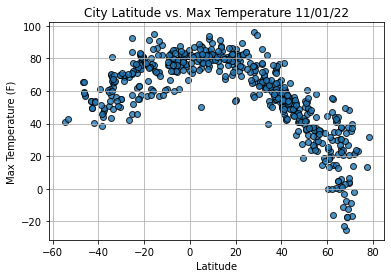

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

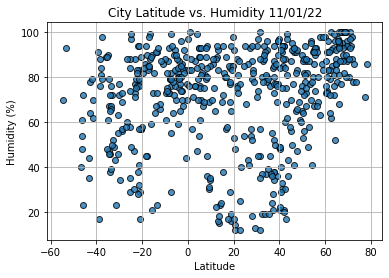

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

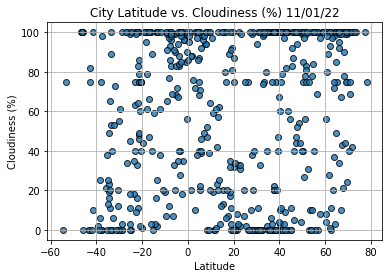

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

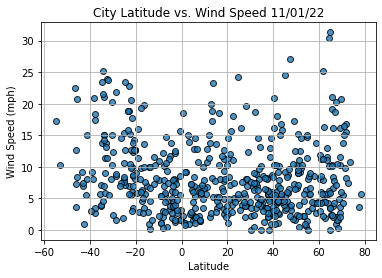

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [25]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = city_data_df.loc[13]
index13

City                 Punta Arenas
Country                        CL
Date          2022-11-01 08:53:38
Lat                        -53.15
Lng                      -70.9167
Max Temp                    42.91
Humidity                       93
Cloudiness                     75
Wind Speed                  10.36
Name: 13, dtype: object

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

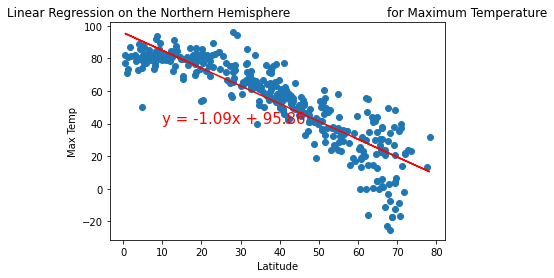

In [30]:
# Linear regression on the Northern Hemisphere - Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

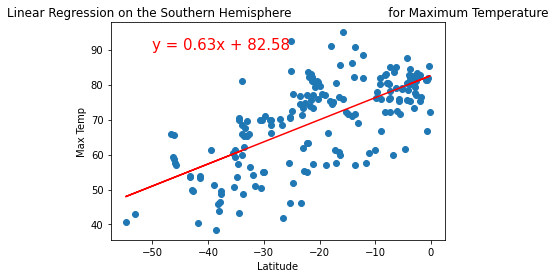

In [31]:
# Linear regression on the Southern Hemisphere - Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

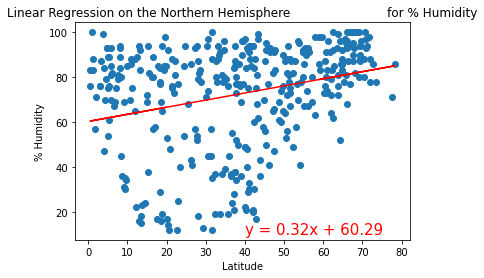

In [32]:
# Linear regression on the Northern Hemisphere - Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

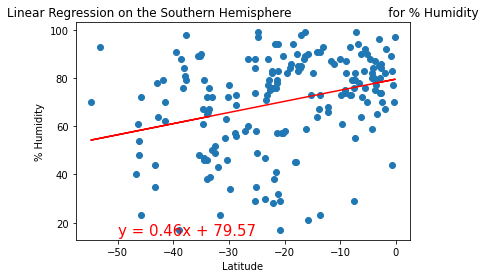

In [33]:
# Linear regression on the Southern Hemisphere - Humidity 
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

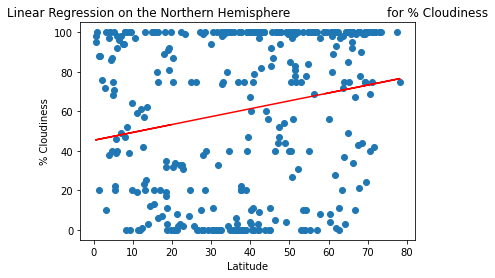

In [35]:
#Linear regression on the Northern Hemisphere - Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

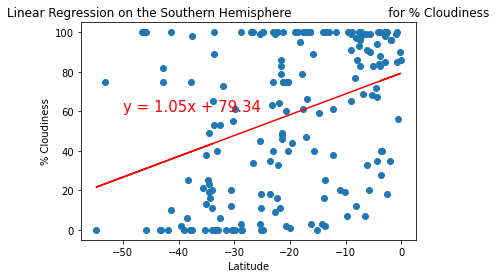

In [36]:
# Linear regression on the Southern Hemisphere - Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

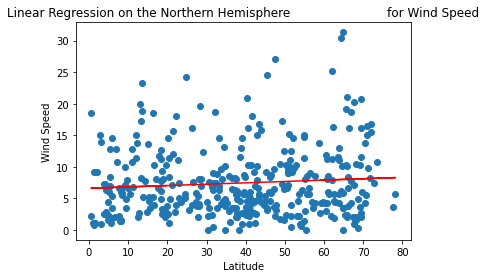

In [37]:
# Linear regression on the Northern Hemisphere - Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

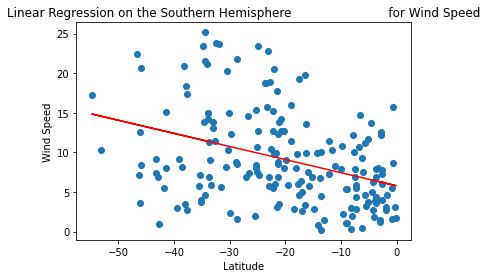

In [38]:
# Linear regression on the Southern Hemisphere - Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))